### Load Mujoco Engine

In [2]:
import mujoco
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from model.mujoco_parser import MuJoCoParserClass
from model.util import sample_xyzs,rpy2r,r2quat
np.set_printoptions(precision=2,suppress=True,linewidth=100)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("MuJoCo version:[%s]"%(mujoco.__version__))

MuJoCo version:[2.3.2]


### Parse

In [3]:
xml_path = '../asset/ur5e/scene_ur5e_rg2_obj.xml'
env = MuJoCoParserClass(name='UR5e with RG2 gripper',rel_xml_path=xml_path,VERBOSE=True)
obj_names = [body_name for body_name in env.body_names
             if body_name is not None and (body_name.startswith("obj_"))]
n_obj = len(obj_names)
# Place objects in a row
xyzs = sample_xyzs(n_sample=n_obj,
                   x_range=[0.45,1.65],y_range=[-0.38,0.38],z_range=[0.81,0.81],min_dist=0.2)
colors = np.array([plt.cm.gist_rainbow(x) for x in np.linspace(0,1,n_obj)])
for obj_idx,obj_name in enumerate(obj_names):
    jntadr = env.model.body(obj_name).jntadr[0]
    env.model.joint(jntadr).qpos0[:3] = xyzs[obj_idx,:]
    geomadr = env.model.body(obj_name).geomadr[0]
    env.model.geom(geomadr).rgba = colors[obj_idx] # color

# Move tables and robot base
env.model.body('base_table').pos = np.array([0,0,0])
env.model.body('front_object_table').pos = np.array([1.05,0,0])
env.model.body('side_object_table').pos = np.array([0,-0.85,0])
env.model.body('base').pos = np.array([0,0,0.8])
print ("Ready.")

dt:[0.0020] HZ:[500]
n_body:[52]
geom_names:['floor', None, None, None, None, None, 'shoulder_link', None, None, None, None, 'upper_arm_link_1', 'upper_arm_link_2', None, None, None, None, 'forearm_link_1', 'forearm_link_2', None, None, None, 'wrist_1_link', None, None, None, 'wrist_2_link_1', 'wrist_2_link_2', None, 'wrist_3_link', 'tcp_link', 'camera_mount', 'camera_mounted_gear', 'rg2_gripper_base_link', 'camera_center', 'rg2_gripper_finger1_finger_link', 'rg2_gripper_finger1_inner_knuckle_link', 'rg2_gripper_finger1_finger_tip_link', 'rg2_gripper_finger2_finger_link', 'rg2_gripper_finger2_inner_knuckle_link', 'rg2_gripper_finger2_finger_tip_link', 'front_object_table', 'side_object_table', 'base_table', 'obj_cylinder_01', 'obj_cylinder_02', 'obj_cylinder_03', 'obj_cylinder_04', 'obj_cylinder_05', 'obj_cylinder_06', 'obj_cylinder_07', 'obj_cylinder_08']
n_body:[29]
body_names:['world', 'base', 'shoulder_link', 'upper_arm_link', 'forearm_link', 'wrist_1_link', 'wrist_2_link', 'wrist_

In [4]:
joint_names = env.rev_joint_names[:6]
idxs_forward = [env.model.joint(joint_name).qposadr[0] for joint_name in env.joint_names[:6]]
idxs_jacobian = [env.model.joint(joint_name).dofadr[0] for joint_name in env.joint_names[:6]]
list1, list2 = env.ctrl_joint_idxs, idxs_forward
idxs_step = []
for i in range(len(list2)):
    if list2[i] not in list1:
        idxs_step.append(list1.index(list2[i]))
        

In [5]:
joint_value = [-1.570521656666891, -2.311883111993307, 2.1441715399371546, 1.73920385419812, 0.7853929996490479, -1.5711215178119105]

### Solve Inverse Kinematics on `Mujoco Engine`

In [6]:
env.init_viewer(viewer_title='UR5e with RG2 gripper',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True)
env.update_viewer(azimuth=174.08,distance=2.76,elevation=-33,lookat=[0.1,0.05,0.16],
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=True,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=True,jointlength=0.5,jointwidth=0.1,jointrgba=[0.2,0.6,0.8,0.6])
env.reset()

R_trgt = rpy2r(np.radians([-180,0,90]))

q_ik = env.solve_ik(
    body_name='tcp_link',p_trgt=np.array([0.7, -0.2, 0.60]),R_trgt=R_trgt,
    IK_P=True,IK_R=True, q_init=np.array(joint_value),idxs_forward=idxs_forward, idxs_jacobian=idxs_jacobian,
    RESET=False,DO_RENDER=True,render_every=1,th=1*np.pi/180.0,err_th=1e-3)

# Close viewer
env.close_viewer()
print ("Done.")

print(q_ik)

Pressed ESC
Quitting.


Exception: GLFW window does not exist but you tried to render.

In [ ]:
env.init_viewer(viewer_title='UR5e with RG2 gripper',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True)
env.update_viewer(azimuth=174.08,distance=2.76,elevation=-33,lookat=[0.1,0.05,0.16],
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=True,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=True,jointlength=0.5,jointwidth=0.1,jointrgba=[0.2,0.6,0.8,0.6])
env.reset()

p_trgt=np.array([0.7, -0.2, 1.20])
R_trgt = rpy2r(np.radians([-180,0,90]))
q_init=np.array(joint_value)
body_name='tcp_link'

render_every = 1
th=1*np.pi/180.0
err_th=1e-3
DO_RENDER = True

q_backup = env.get_q(joint_idxs=idxs_forward)
q = q_init.copy()
env.forward(q=q,joint_idxs=idxs_forward)
tick = 0
while True:
    tick = tick + 1
    J,err = env.get_ik_ingredients(
        body_name=body_name,p_trgt=p_trgt,R_trgt=R_trgt,IK_P=True,IK_R=True)
    dq = env.damped_ls(J,err,stepsize=1,eps=1e-1,th=th)
    q = q + dq[idxs_jacobian]

    p_contacts,f_contacts,geom1s,geom2s = env.get_contact_info(must_include_prefix=None,must_exclude_prefix='obj_')
    print(f"p_contacts: {p_contacts}")
    print(f"f_contacts: {f_contacts}")
    print(f"geom1s: {geom1s}")
    print(f"geom2s: {geom2s}")

    env.forward(q=q,joint_idxs=idxs_forward)
    # Terminate condition
    err_norm = np.linalg.norm(err)
    if err_norm < err_th:
        break
    # Render
    if DO_RENDER:
        if ((tick-1)%render_every) == 0:
            p_tcp,R_tcp = env.get_pR_body(body_name=body_name)
            env.plot_T(p=p_tcp,R=R_tcp,PLOT_AXIS=True,axis_len=0.1,axis_width=0.005)
            env.plot_T(p=p_trgt,R=R_trgt,PLOT_AXIS=True,axis_len=0.2,axis_width=0.005)
            env.render()
# Back to back-uped position
q_ik = env.get_q(joint_idxs=idxs_forward)
env.forward(q=q_backup,joint_idxs=idxs_forward)

# Close viewer
env.close_viewer()
print ("Done.")

p_contacts: [array([0.33, 0.  , 1.15])]
f_contacts: [array([ 0.01, -0.04, 67.5 ])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([ 0.33, -0.  ,  1.15])]
f_contacts: [array([ 0.04, -0.04, 67.5 ])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([ 0.33, -0.  ,  1.15])]
f_contacts: [array([ 0.07, -0.03, 67.5 ])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([ 0.34, -0.01,  1.15])]
f_contacts: [array([ 0.1 , -0.03, 67.5 ])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([ 0.34, -0.01,  1.16])]
f_contacts: [array([ 0.13, -0.02, 67.5 ])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([ 0.34, -0.01,  1.16])]
f_contacts: [array([ 0.16, -0.02, 67.5 ])]
geom1s:

p_contacts: [array([0.82, 0.41, 0.86])]
f_contacts: [array([-113.98,   14.22,  -17.56])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([0.82, 0.4 , 0.86])]
f_contacts: [array([-87.22,  13.73, -12.66])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([0.82, 0.4 , 0.86])]
f_contacts: [array([-62.54,  12.98,  -6.35])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([0.82, 0.4 , 0.86])]
f_contacts: [array([-40.11,  12.09,   1.96])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([0.82, 0.39, 0.86])]
f_contacts: [array([-20.92,   9.83,  10.77])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([0.82, 0.39, 0.86])]
f_contacts: [array([-12.36,  -0.02,  12.08])]
g

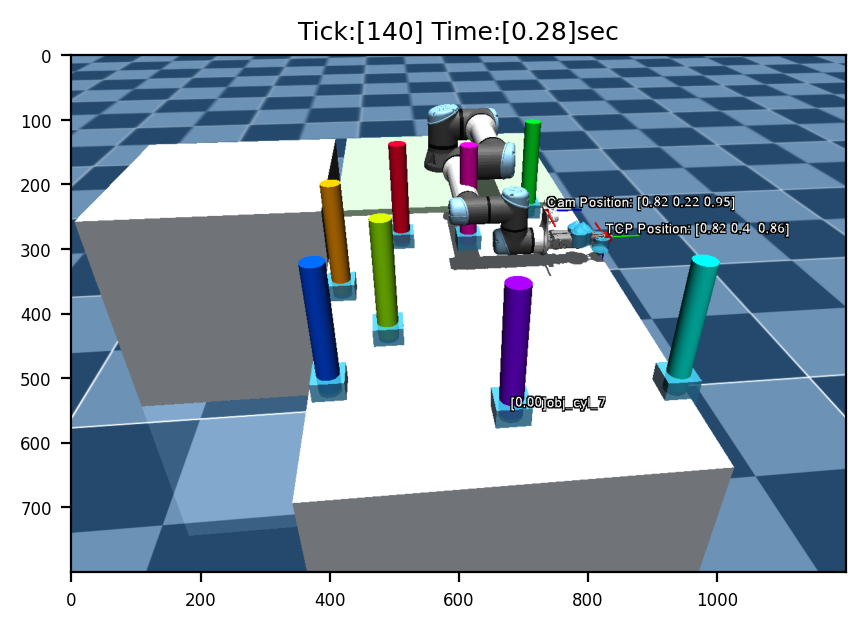

Done.


In [ ]:
env.init_viewer(viewer_title='UR5e with RG2 gripper',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True)
env.update_viewer(azimuth=174.08,distance=2.76,elevation=-33,lookat=[0.1,0.05,0.16],
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=True,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=True,jointlength=0.5,jointwidth=0.1,jointrgba=[0.2,0.6,0.8,0.6])
env.reset()

tick = 0
while (env.get_sim_time() < 100.0) and env.is_viewer_alive():
    tick = tick + 1
    env.step(ctrl=q_ik, ctrl_idxs=idxs_forward)

    p_contacts,f_contacts,geom1s,geom2s = env.get_contact_info(must_include_prefix=None,must_exclude_prefix='obj_')
    print(f"p_contacts: {p_contacts}")
    print(f"f_contacts: {f_contacts}")
    print(f"geom1s: {geom1s}")
    print(f"geom2s: {geom2s}")

    # Render
    p_tcp,R_tcp = env.get_pR_body(body_name='tcp_link')
    p_cam,R_cam = env.get_pR_body(body_name='camera_center')
    p_base,R_base = env.get_pR_body(body_name='base')
    p_obj,R_obj = env.get_pR_body(body_name='obj_cylinder_07')
    env.plot_T(p=p_obj,R=R_obj,
                PLOT_AXIS=False,label='[%.2f]obj_cyl_7'%(env.get_sim_time()))

    # env.plot_T(p=np.zeros(3),R=np.eye(3,3),PLOT_AXIS=True,axis_len=1.0,axis_width=0.01)
    env.plot_T(p=p_tcp,R=R_tcp,PLOT_AXIS=True,axis_len=0.1,axis_width=0.0025,
               label=f'TCP Position: {p_tcp}')
    env.plot_T(p=p_cam,R=R_cam,PLOT_AXIS=True,axis_len=0.1,axis_width=0.0025,
               label=f'Cam Position: {p_cam}')
    # env.plot_T(p=p_base,R=R_base,PLOT_AXIS=True,axis_len=1.0,axis_width=0.01)
    env.plot_T(p=p_base+np.array([0,0,0.5]),R=np.eye(3,3),
                PLOT_AXIS=False,label='[%.2f]sec'%(env.get_sim_time()))
    env.render()
    if env.loop_every(HZ=1) or (tick == 1):
        scene_img = env.grab_image()
# Plot an image
plt.figure(figsize=(5,4)); plt.imshow(scene_img)
plt.title("Tick:[%d] Time:[%.2f]sec"%(env.tick,env.get_sim_time()),fontsize=9)
plt.show()
# Close viewer
env.close_viewer()
print ("Done.")

In [ ]:
p_contacts,f_contacts,geom1s,geom2s = env.get_contact_info(must_include_prefix=None,must_exclude_prefix='obj')
print(f"p_contacts: {p_contacts}")
print(f"f_contacts: {f_contacts}")
print(f"geom1s: {geom1s}")
print(f"geom2s: {geom2s}")


p_contacts: [array([ 0.69, -0.03,  1.15])]
f_contacts: [array([-11.52,   2.61,  -0.44])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']


In [ ]:
geom2s[0]

'rg2_gripper_finger2_finger_tip_link'

In [ ]:
f_contacts[0]

array([-11.52,   2.61,  -0.44])

In [ ]:
np.linalg.norm(f_contacts[0])

11.819220185740036

In [ ]:
normalized_foce = f_contacts[0]/np.linalg.norm(f_contacts[0]) # normalize the force

In [10]:
env.init_viewer(viewer_title='UR5e with RG2 gripper',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True)
env.update_viewer(azimuth=174.08,distance=2.76,elevation=-33,lookat=[0.1,0.05,0.16],
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=True,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=True,jointlength=0.5,jointwidth=0.1,jointrgba=[0.2,0.6,0.8,0.6])
env.reset()

p_trgt=np.array([0.7, -0.2, 0.90])
R_trgt = rpy2r(np.radians([-180,0,90]))
q_init=np.array(joint_value)
body_name='tcp_link'

render_every = 1
th=1*np.pi/180.0
err_th=1e-3
DO_RENDER = True

prefix_collision = 'base_table'
self_collision = ''

q_backup = env.get_q(joint_idxs=idxs_forward)
q = q_init.copy()
env.forward(q=q,joint_idxs=idxs_forward)
tick = 0
while True:
    tick = tick + 1
    J,err = env.get_ik_ingredients(
        body_name=body_name,p_trgt=p_trgt,R_trgt=R_trgt,IK_P=True,IK_R=True)
    dq = env.damped_ls(J,err,stepsize=1,eps=1e-1,th=th)
    q = q + dq[idxs_jacobian]

    env.forward(q=q,joint_idxs=idxs_forward)
    p_contacts,f_contacts,geom1s,geom2s = env.get_contact_info(must_include_prefix=None,must_exclude_prefix='obj_')
    print(f"p_contacts: {p_contacts}")
    print(f"f_contacts: {f_contacts}")
    print(f"geom1s: {geom1s}")
    print(f"geom2s: {geom2s}")

    while (prefix_collision in geom1s) or (prefix_collision in geom2s):

        q = q - dq[idxs_jacobian]
        print("Collision detected!")

        for _ in range(5):
            contact_body = geom1s[0]
            p_contact = p_contacts[0]
            f_contact = f_contacts[0]
            repel_direction = f_contact/np.linalg.norm(f_contact) # normalize the force
            repel_step_size = 1
            p_repel_trgt = p_contact + repel_direction


            J_contact, err_contact = env.get_ik_ingredients(
            body_name=contact_body,p_trgt=p_repel_trgt,R_trgt=np.eye(3),IK_P=True,IK_R=False)
            dq = env.damped_ls(J_contact, err_contact,stepsize=repel_step_size,eps=1e-1,th=th)
            q = q + dq[idxs_jacobian]
            env.forward(q=q,joint_idxs=idxs_forward)

            env.plot_T(p=p_contact,   R=np.eye(3),PLOT_AXIS=True,axis_len=0.1,axis_width=0.005, label='p_contact')
            env.plot_T(p=p_repel_trgt,R=np.eye(3),PLOT_AXIS=True,axis_len=0.2,axis_width=0.005, label='p_repel_trgt')
            env.render()

        p_contacts,f_contacts,geom1s,geom2s = env.get_contact_info(must_include_prefix=None,must_exclude_prefix='obj_')

        
    env.forward(q=q,joint_idxs=idxs_forward)
    # Terminate condition
    err_norm = np.linalg.norm(err)
    if err_norm < err_th:
        break
    # Render
    if DO_RENDER:
        if ((tick-1)%render_every) == 0:
            p_tcp,R_tcp = env.get_pR_body(body_name=body_name)
            env.plot_T(p=p_tcp,R=R_tcp,PLOT_AXIS=True,axis_len=0.1,axis_width=0.005)
            env.plot_T(p=p_trgt,R=R_trgt,PLOT_AXIS=True,axis_len=0.2,axis_width=0.005)
            env.render()
# Back to back-uped position
q_ik = env.get_q(joint_idxs=idxs_forward)
env.forward(q=q_backup,joint_idxs=idxs_forward)

# Close viewer
env.close_viewer()
print ("Done.")

p_contacts: [array([ 0.33, -0.  ,  1.15])]
f_contacts: [array([ 0.03, -0.04, 67.5 ])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([ 0.33, -0.  ,  1.15])]
f_contacts: [array([ 0.06, -0.03, 67.5 ])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([ 0.34, -0.01,  1.14])]
f_contacts: [array([ 0.09, -0.03, 67.5 ])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([ 0.34, -0.01,  1.14])]
f_contacts: [array([ 0.13, -0.02, 67.5 ])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([ 0.34, -0.01,  1.14])]
f_contacts: [array([ 0.16, -0.02, 67.5 ])]
geom1s: ['rg2_gripper_finger1_finger_tip_link']
geom2s: ['rg2_gripper_finger2_finger_tip_link']
p_contacts: [array([ 0.35, -0.01,  1.14])]
f_contacts: [array([ 0.19, -0.01, 67.5 ])]
geom

KeyError: "Invalid name 'wrist_2_link_1'. Valid names: ['base', 'base_table', 'camera_center', 'camera_mount', 'forearm_link', 'front_object_table', 'obj_cylinder_01', 'obj_cylinder_02', 'obj_cylinder_03', 'obj_cylinder_04', 'obj_cylinder_05', 'obj_cylinder_06', 'obj_cylinder_07', 'obj_cylinder_08', 'rg2_gripper_base_link', 'rg2_gripper_finger1_finger_link', 'rg2_gripper_finger1_finger_tip_link', 'rg2_gripper_finger1_inner_knuckle_link', 'rg2_gripper_finger2_finger_link', 'rg2_gripper_finger2_finger_tip_link', 'rg2_gripper_finger2_inner_knuckle_link', 'shoulder_link', 'side_object_table', 'tcp_link', 'upper_arm_link', 'world', 'wrist_1_link', 'wrist_2_link', 'wrist_3_link']"

In [11]:
contact_body

'wrist_2_link_1'

In [13]:
env.data.geom(contact_body)

<_MjDataGeomViews
  id: 26
  name: 'wrist_2_link_1'
  xmat: array([ 0.  ,  1.  , -0.07, -0.43,  0.07,  0.9 ,  0.9 ,  0.03,  0.43])
  xpos: array([ 0.16, -0.29,  0.87])
>

In [54]:
geom1s, geom2s

(['rg2_gripper_finger1_finger_tip_link'],
 ['rg2_gripper_finger2_finger_tip_link'])

In [53]:
geom2s[0], prefix_collision

('rg2_gripper_finger2_finger_tip_link', 'base_table')

In [14]:
env.get_p_body('')

KeyError: "Invalid name ''. Valid names: ['base', 'base_table', 'camera_center', 'camera_mount', 'forearm_link', 'front_object_table', 'obj_cylinder_01', 'obj_cylinder_02', 'obj_cylinder_03', 'obj_cylinder_04', 'obj_cylinder_05', 'obj_cylinder_06', 'obj_cylinder_07', 'obj_cylinder_08', 'rg2_gripper_base_link', 'rg2_gripper_finger1_finger_link', 'rg2_gripper_finger1_finger_tip_link', 'rg2_gripper_finger1_inner_knuckle_link', 'rg2_gripper_finger2_finger_link', 'rg2_gripper_finger2_finger_tip_link', 'rg2_gripper_finger2_inner_knuckle_link', 'shoulder_link', 'side_object_table', 'tcp_link', 'upper_arm_link', 'world', 'wrist_1_link', 'wrist_2_link', 'wrist_3_link']"

In [45]:
import math
PI = math.pi

joint_idx = np.asarray([ i for i in range(16,22)], 'int32')

env.init_viewer(viewer_title='IK using UR',viewer_width=1200,viewer_height=800,viewer_hide_menus=True)
env.update_viewer(azimuth=80,distance=2.5,elevation=-30,lookat=[0,0,1.5])
env.update_viewer(VIS_TRANSPARENT=True) # transparent
env.reset() # reset

# Set (multiple) IK targets
ik_body_names = ['tcp_link','wrist_3_link']
ik_p_trgts = [env.get_p_body(body_name='wrist_3_link')+np.array([-0.2, 0.0, 0.2]),
              env.get_p_body(body_name='wrist_3_link')+np.array([-0.35,0.0,0.2])]
ik_R_trgts = [env.get_R_body(body_name='tcp_link')@rpy2r(np.array([0, 0, 0.5 *PI])),
              env.get_R_body(body_name='wrist_3_link')@rpy2r(0.0*np.random.randn(3)*np.pi/180.0)]
IK_Ps = [True,True]
IK_Rs = [True,False]

# Loop
q = env.get_q(joint_idxs=idxs_jacobian)

# q = env.data.qpos[16:22]
imgs,img_ticks,max_tick = [],[],1000
while (env.tick < max_tick) and env.is_viewer_alive():
    # Numerical IK
    J_aug,err_aug = [],[]
    for ik_idx,ik_body_name in enumerate(ik_body_names):
        p_trgt,R_trgt = ik_p_trgts[ik_idx],ik_R_trgts[ik_idx]
        IK_P,IK_R = IK_Ps[ik_idx],IK_Rs[ik_idx]
        J,err = env.get_ik_ingredients(
            body_name=ik_body_name,p_trgt=p_trgt,R_trgt=R_trgt,IK_P=IK_P,IK_R=IK_R)
        if (J is None) and (err is None): continue
        if len(J_aug) == 0:
            J_aug,err_aug = J,err
        else:
            J_aug   = np.concatenate((J_aug,J),axis=0)
            err_aug = np.concatenate((err_aug,err),axis=0)
    dq = env.damped_ls(J_aug,err_aug,stepsize=1,eps=1e-1,th=5*np.pi/180.0)

    # Update q and FK
    q = q + dq[idxs_jacobian]
    env.forward(q=q,joint_idxs=idxs_forward)

    # Render
    for ik_idx,ik_body_name in enumerate(ik_body_names):
        p_trgt,R_trgt = ik_p_trgts[ik_idx],ik_R_trgts[ik_idx]
        IK_P,IK_R = IK_Ps[ik_idx],IK_Rs[ik_idx]
        if (IK_P is None) and (IK_R is None): continue
        env.plot_T(p=env.get_p_body(body_name=ik_body_name),R=env.get_R_body(body_name=ik_body_name),
                   PLOT_AXIS=IK_R,axis_len=0.2,axis_width=0.01,
                   PLOT_SPHERE=IK_P,sphere_r=0.05,sphere_rgba=[1,0,0,0.9])
        env.plot_T(p=p_trgt,R=R_trgt,
                   PLOT_AXIS=IK_R,axis_len=0.2,axis_width=0.01,
                   PLOT_SPHERE=IK_P,sphere_r=0.05,sphere_rgba=[0,0,1,0.9])
    env.plot_T(p=[0,0,0],R=np.eye(3,3),PLOT_AXIS=True,axis_len=1.0)
    env.render()
    # Print and save image 
    if (env.tick)%(max_tick//10)==0 or (env.tick==1):
        print ("[%d/%d] IK error:[%.4f]"%(env.tick,max_tick,np.linalg.norm(err_aug)))
        img = env.grab_image()
        imgs.append(img)
        img_ticks.append(env.tick)
# Close viewers
env.close_viewer()
print ("Done.")

[1/1000] IK error:[1.6682]
[100/1000] IK error:[0.0849]
[200/1000] IK error:[0.0849]
[300/1000] IK error:[0.0849]
[400/1000] IK error:[0.0849]
[500/1000] IK error:[0.0849]
[600/1000] IK error:[0.0849]
[700/1000] IK error:[0.0849]
[800/1000] IK error:[0.0849]
[900/1000] IK error:[0.0849]
[1000/1000] IK error:[0.0849]
Done.


In [26]:
env.rev_joint_idxs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)